# Part I - Prosper Loan Data Analysis
## by Mohamed Mahmud Katun

## Introduction
> This dataset (prosperLoanData) is a financial dataset for loan processing. It is related to the loan, borrowers, lenders, interest rate and other information required from borrowers. It contains 113,937 loans with 81 variables.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime
from scipy import stats
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Overview of the data shape and Composition
print('Shape:{}\n'.format(df.shape))
print(df.info())
df.head()

Shape:(113937, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float6

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Summary Statistics
print('\033[1m Statistical Summary\r\n\n\033[0m')
df.describe()

 Statistical Summary




,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# The variables of the dataset are large. We will select only variables of interest
variable_interest = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                      'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
                     'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
                     'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'StatedMonthlyIncome', 
                     'BorrowerState', 'DebtToIncomeRatio', 'IncomeVerifiable', 'InvestmentFromFriendsCount', 
                     'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'PercentFunded', 
                      'InvestmentFromFriendsAmount', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']

In [6]:
# Create a new dataframe with variables of interest
loan_df = df[variable_interest]
loan_df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,...,DebtToIncomeRatio,IncomeVerifiable,InvestmentFromFriendsCount,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,PercentFunded,InvestmentFromFriendsAmount,CreditScoreRangeLower,CreditScoreRangeUpper
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,NaN,0,Other,...,0.17,True,0,9425,2007-09-12 00:00:00,330.43,1.0,0.0,640.0,659.0
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,6.0,A,7.0,2,Professional,...,0.18,True,0,10000,2014-03-03 00:00:00,318.93,1.0,0.0,680.0,699.0
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,NaN,0,Other,...,0.06,True,0,3001,2007-01-17 00:00:00,123.32,1.0,0.0,480.0,499.0
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,6.0,A,9.0,16,Skilled Labor,...,0.15,True,0,10000,2012-11-01 00:00:00,321.45,1.0,0.0,800.0,819.0
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,3.0,D,4.0,2,Executive,...,0.26,True,0,15000,2013-09-20 00:00:00,563.97,1.0,0.0,680.0,699.0


In [7]:
# Check for NaN values
loan_df.isnull().sum()

ListingCreationDate                0
Term                               0
LoanStatus                         0
BorrowerAPR                       25
BorrowerRate                       0
ProsperRating (numeric)        29084
ProsperRating (Alpha)          29084
ProsperScore                   29084
ListingCategory (numeric)          0
Occupation                      3588
EmploymentStatus                2255
EmploymentStatusDuration        7625
IsBorrowerHomeowner                0
CurrentlyInGroup                   0
IncomeRange                        0
StatedMonthlyIncome                0
BorrowerState                   5515
DebtToIncomeRatio               8554
IncomeVerifiable                   0
InvestmentFromFriendsCount         0
LoanOriginalAmount                 0
LoanOriginationDate                0
MonthlyLoanPayment                 0
PercentFunded                      0
InvestmentFromFriendsAmount        0
CreditScoreRangeLower            591
CreditScoreRangeUpper            591
d

In [8]:
# Check for duplicates
loan_df.duplicated().sum()

0

In [9]:
# Select dataset with Ratings since it is the important factor investors used to fund loans
loan_df =loan_df[loan_df['ProsperRating (Alpha)'].notnull()]

In [10]:
# Fill missing occupations with 'Unspecified'
loan_df['Occupation']=loan_df['Occupation'].fillna('Unspecified')

In [11]:
# The missing values in 'DebtToIncomeRatio' will be replaced with the mean
loan_df['DebtToIncomeRatio']=loan_df['DebtToIncomeRatio'].fillna(loan_df['DebtToIncomeRatio'].mean())

In [12]:
# Access the dataset
loan_df.isnull().sum()

ListingCreationDate             0
Term                            0
LoanStatus                      0
BorrowerAPR                     0
BorrowerRate                    0
ProsperRating (numeric)         0
ProsperRating (Alpha)           0
ProsperScore                    0
ListingCategory (numeric)       0
Occupation                      0
EmploymentStatus                0
EmploymentStatusDuration       19
IsBorrowerHomeowner             0
CurrentlyInGroup                0
IncomeRange                     0
StatedMonthlyIncome             0
BorrowerState                   0
DebtToIncomeRatio               0
IncomeVerifiable                0
InvestmentFromFriendsCount      0
LoanOriginalAmount              0
LoanOriginationDate             0
MonthlyLoanPayment              0
PercentFunded                   0
InvestmentFromFriendsAmount     0
CreditScoreRangeLower           0
CreditScoreRangeUpper           0
dtype: int64

In [13]:
# Convert 'ListingCreationDate' type from str to datetime and extract 'date', 'month' and 'year'
loan_df['ListingCreationDate']=pd.to_datetime(loan_df['ListingCreationDate'])
loan_df['date'] = loan_df['ListingCreationDate'].dt.date   # 'date' extracted from 'ListingCreationDate'
loan_df['month'] = loan_df['ListingCreationDate'].dt.month # 'month' extracted from 'ListingCreationDate'
loan_df['year']= loan_df['ListingCreationDate'].dt.year    # 'year' extracted from 'ListingCreationDate'

In [14]:
# Convert date to datetime
loan_df['date'] =pd.to_datetime(loan_df['date'])

In [15]:
# Drop 'ListingCreationDate' from the dataframe
loan_df.drop(['ListingCreationDate'], axis=1, inplace=True)

In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Term                         84853 non-null  int64         
 1   LoanStatus                   84853 non-null  object        
 2   BorrowerAPR                  84853 non-null  float64       
 3   BorrowerRate                 84853 non-null  float64       
 4   ProsperRating (numeric)      84853 non-null  float64       
 5   ProsperRating (Alpha)        84853 non-null  object        
 6   ProsperScore                 84853 non-null  float64       
 7   ListingCategory (numeric)    84853 non-null  int64         
 8   Occupation                   84853 non-null  object        
 9   EmploymentStatus             84853 non-null  object        
 10  EmploymentStatusDuration     84834 non-null  float64       
 11  IsBorrowerHomeowner          84853 non-n

In [17]:
# Convert 'LoanOriginationDate' to 'datetime'
loan_df['LoanOriginationDate']=pd.to_datetime(loan_df['LoanOriginationDate'])

In [18]:
# Convert 'ProsperScore' to integer type
loan_df['ProsperScore']=loan_df['ProsperScore'].astype(int)

In [19]:
# Create 'Average_CreditScore' Column
loan_df['Average_CreditScore'] = (loan_df['CreditScoreRangeLower'] + loan_df['CreditScoreRangeUpper'])/2

In [20]:
# Use the Rating available on the data dictionary to create ProsperRating and convert it to ordinal category type
rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
loan_df['ProsperRating'] = loan_df['ProsperRating (Alpha)'].astype(ordered_rating)

In [21]:
loan_df['ListingCategory (numeric)'].unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  3,  8, 11, 14,  9, 17, 10,
        0,  5, 12], dtype=int64)

In [22]:
# Use the Rating available on the data dictionary to create ListingCategory
cat_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loan_df['ListingCategory (numeric)'].replace(cat_dict, inplace =True)
loan_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [23]:
loan_df.ListingCategory.unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expenses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

In [24]:
# Convert 'Month' type  to str
loan_df['month']=loan_df['month'].astype(str)

In [25]:
loan_df.month.unique()

array(['2', '10', '9', '12', '4', '5', '7', '8', '11', '1', '6', '3'],
      dtype=object)

In [26]:
# Replace the numerical values of month with names of month
loan_df['month'] =loan_df.month.replace({'1': 'Jan', '2': 'Feb', '3' : 'Mar', '4' : 'Apr', '5' : 'May', '6' : 'Jun', '7' : 'Jul', '8' : 'Aug', '9' : 'Sep', '10' : 'Oct', '11' : 'Nov', '12' : 'Dec'})
# check the correction
loan_df['month'].unique()

array(['Feb', 'Oct', 'Sep', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [27]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Term                         84853 non-null  int64         
 1   LoanStatus                   84853 non-null  object        
 2   BorrowerAPR                  84853 non-null  float64       
 3   BorrowerRate                 84853 non-null  float64       
 4   ProsperRating (numeric)      84853 non-null  float64       
 5   ProsperRating (Alpha)        84853 non-null  object        
 6   ProsperScore                 84853 non-null  int32         
 7   ListingCategory              84853 non-null  object        
 8   Occupation                   84853 non-null  object        
 9   EmploymentStatus             84853 non-null  object        
 10  EmploymentStatusDuration     84834 non-null  float64       
 11  IsBorrowerHomeowner          84853 non-n

### What is the structure of your dataset?

> There are 84,853 rows in this dataset with 31 variables:
                                  
 1   LoanStatus                           
 2   BorrowerAPR                         
 3   BorrowerRate                       
 4   ProsperRating (numeric)             
 5   ProsperRating (Alpha)               
 6   ProsperScore                          
 7   ListingCategory                      
 8   Occupation                           
 9   EmploymentStatus                     
 10  EmploymentStatusDuration             
 11  IsBorrowerHomeowner                    
 12  CurrentlyInGroup                      
 13  IncomeRange                         
 14  StatedMonthlyIncome                 
 15  BorrowerState                      
 16  DebtToIncomeRatio                   
 17  IncomeVerifiable                      
 18  InvestmentFromFriendsCount            
 19  LoanOriginalAmount                    
 20  LoanOriginationDate          
 21  MonthlyLoanPayment                 
 22  PercentFunded                      
 23  InvestmentFromFriendsAmount        
 24  CreditScoreRangeLower              
 25  CreditScoreRangeUpper               
 26  date                         
 27  month                             
 28  year                                  
 29  Average_CreditScore               
 30  ProsperRating                
 31  Term 

> Most of the variables are numerical in nature except a few bool, datetime and category.

### What is/are the main feature(s) of interest in your dataset?

> My major interests are focused on the categories of people that apply for loan, what they need the loan for and how capable they are to refund. I am also interested in the factors that affect the ratings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since my interest is focused on those that apply for loan, variables;ListingCategory, Occupation, EmploymentStatus, EmploymentStatusDuration, IncomeRange, IsBorrowerHomeowner, DebtToIncomeRatio will be helpful in my findings. Also, year, month and CreditScore will be explored to find out about the factors that affect ratings. 

## Univariate Exploration

> In this section, I am going to investigate distributions of individual variables in the dataset.


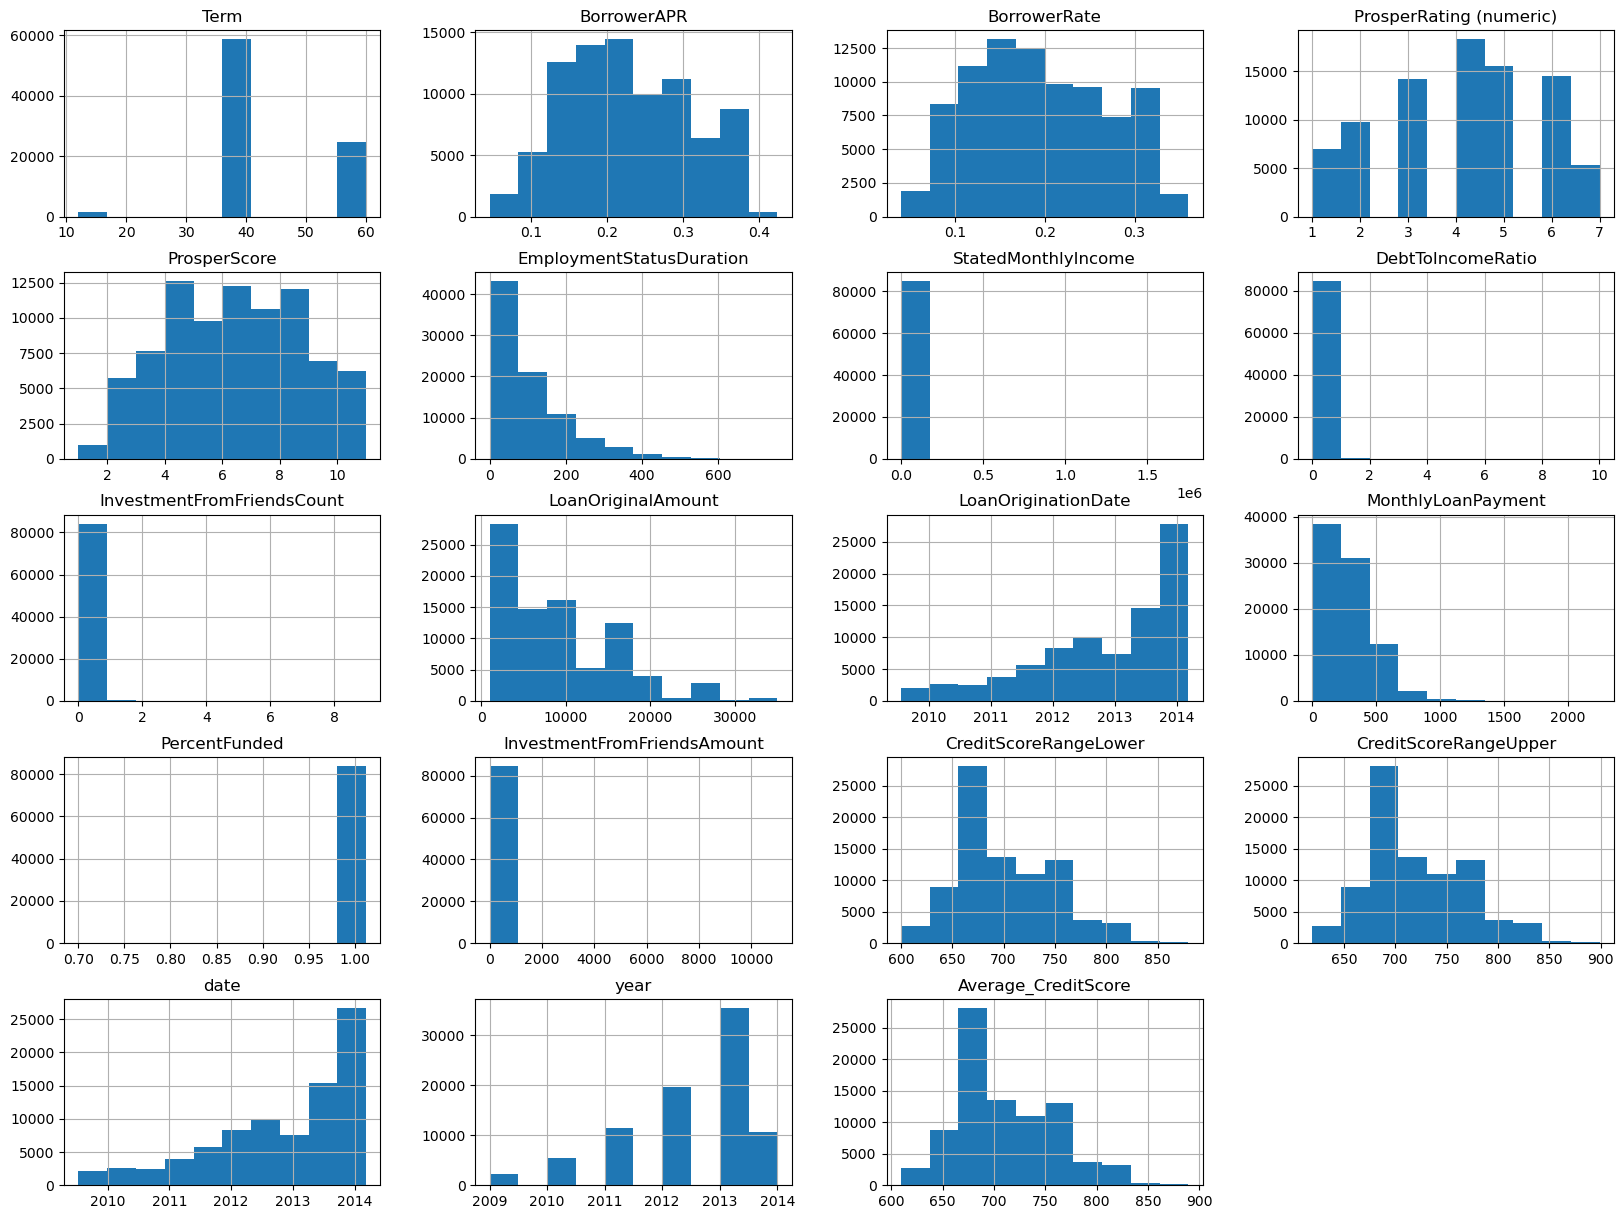

In [28]:
# Using Pandas to plot histograms of numerical columns
plt.rcdefaults()
base_color = sns.color_palette()[0]
loan_df.hist(figsize=(20,15));

### What are the most Popular Occupations?

In [30]:
# 25 most popular occupations of borrowers
popular_occupation = loan_df['Occupation'].value_counts()[:25]

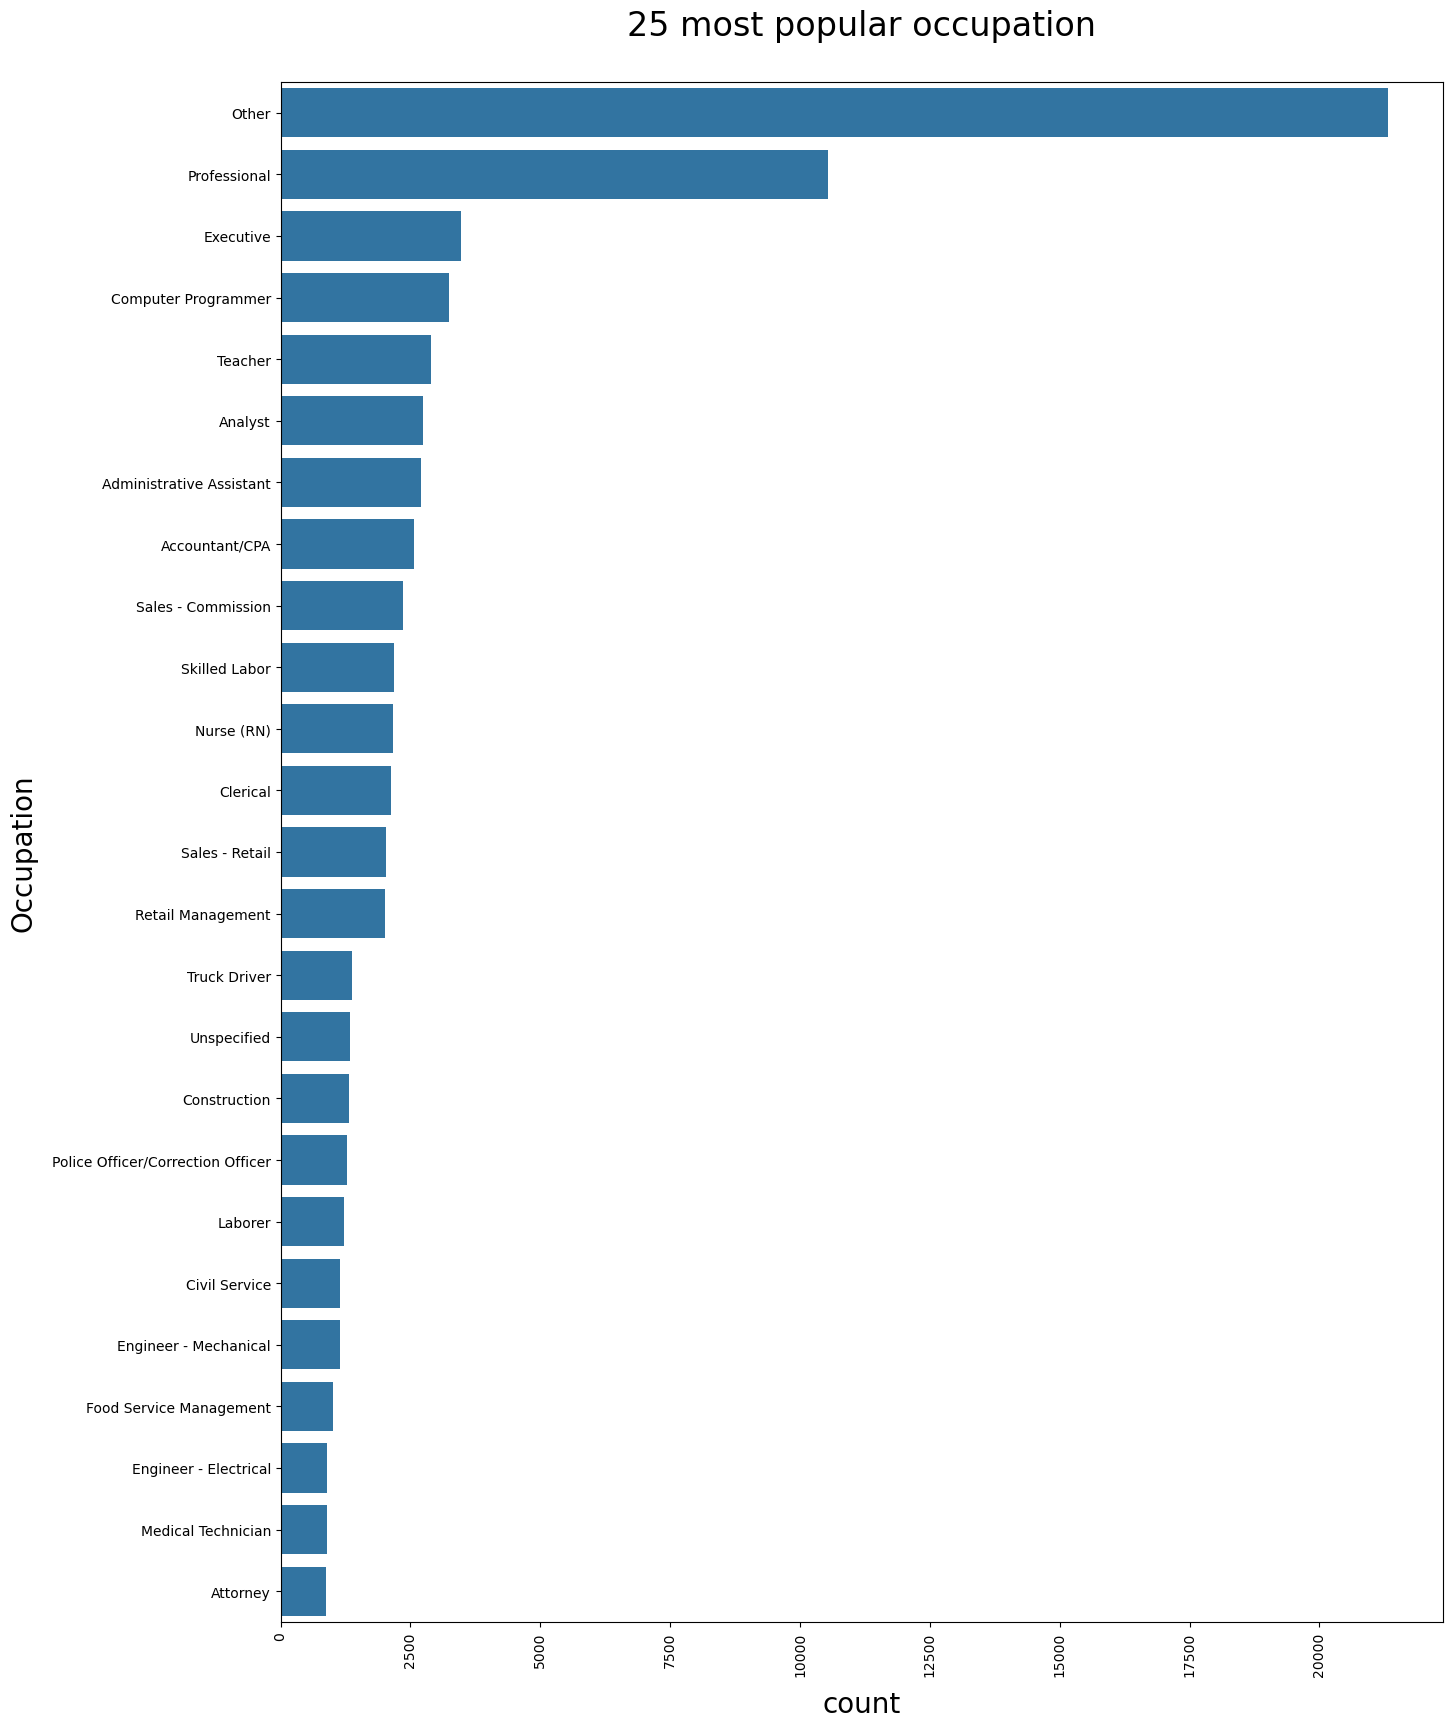

In [31]:
# 25 most popular occupation
sns.barplot(x=popular_occupation, y=popular_occupation.index, color=base_color)
plt.title('25 most popular occupation', fontsize=24, y=1.025)
plt.xlabel('count', labelpad=10, fontsize=20)
plt.ylabel('Occupation', labelpad=10, fontsize=20)
plt.xticks(rotation=90);

> It is clear that **most borrowers are Professionals**. Although, some did not specify their occupation and many are grouped under "others".

> Let us examine the employment status of the borrowers.

### What is the distribution of Borrowers Employment Status ?

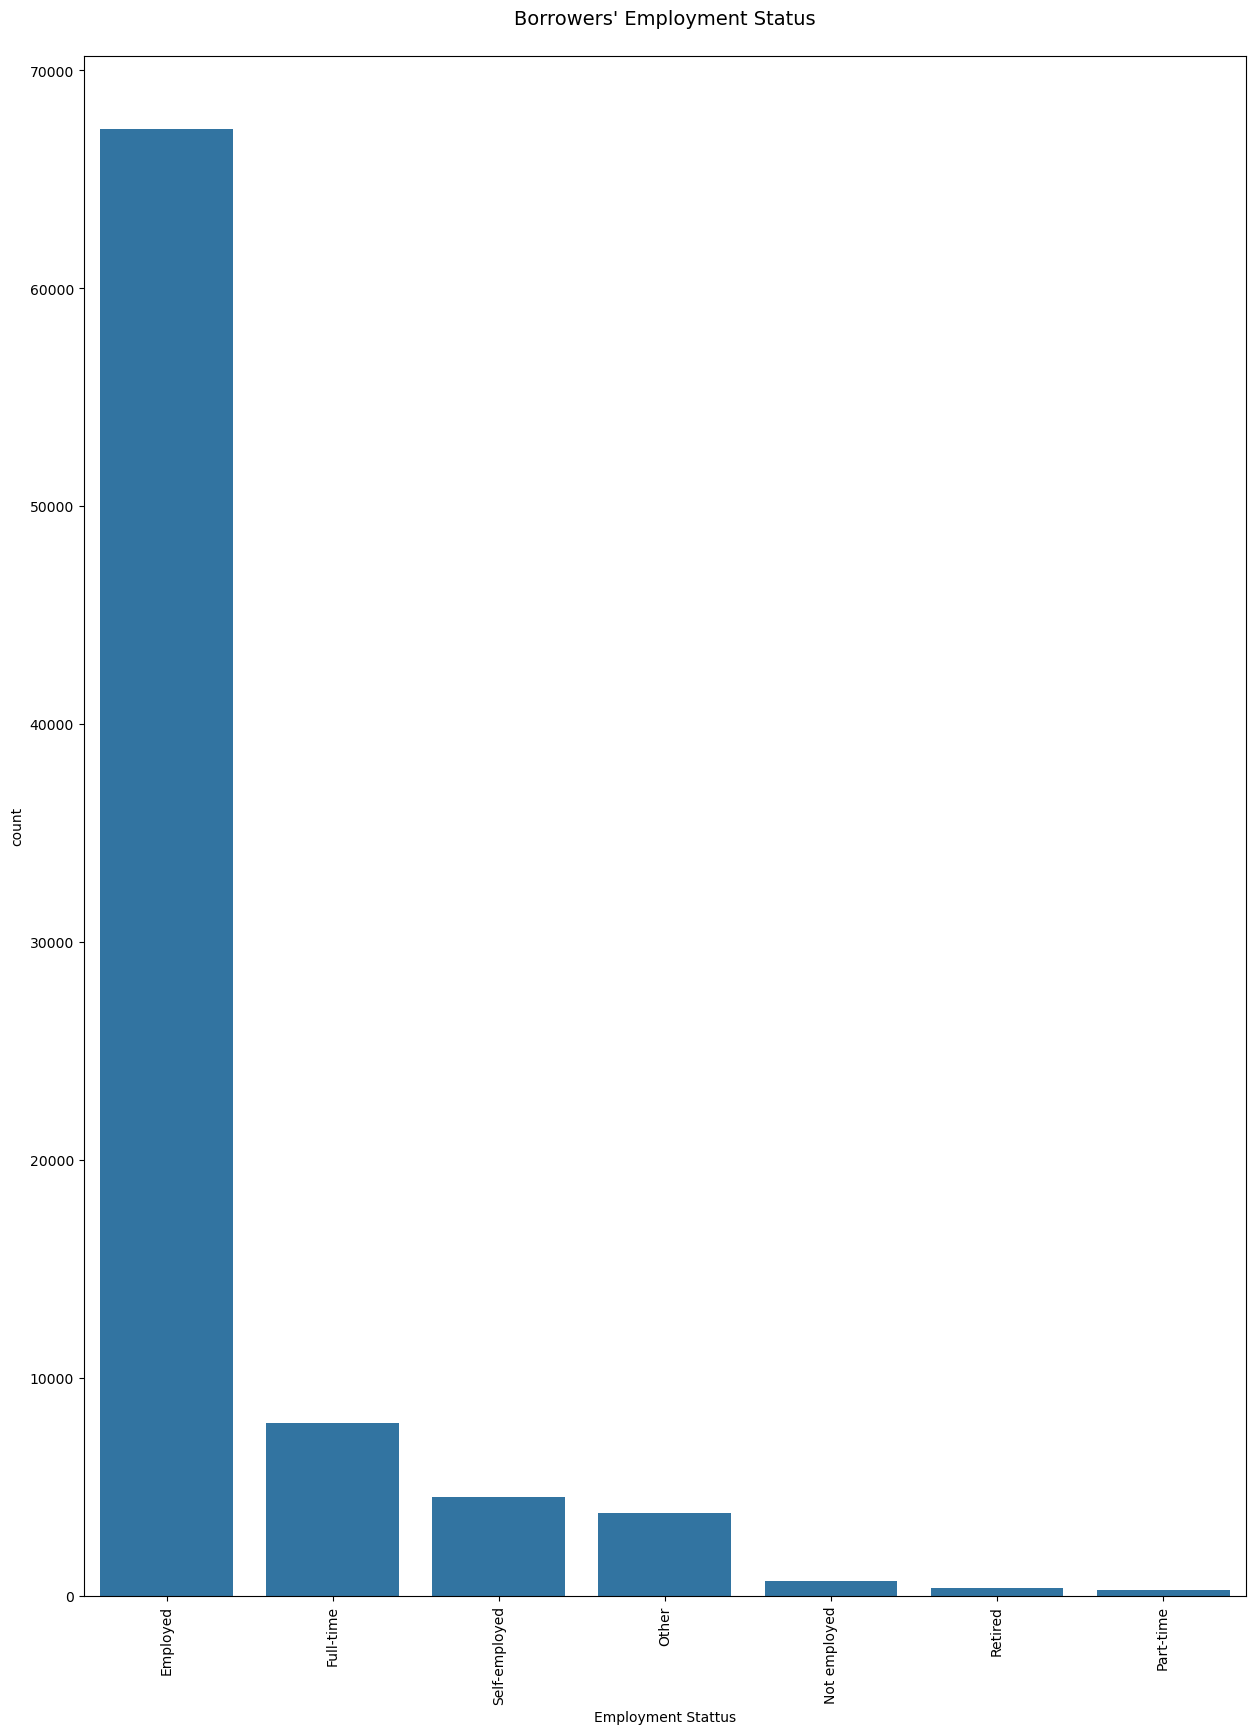

In [32]:
# Distribution of Employment Status
plt.xticks(rotation=90);
rcParams['figure.figsize'] = 10,5
Employment_order = loan_df.EmploymentStatus.value_counts().index # Order the categorical variable 
sns.countplot(data=loan_df, x='EmploymentStatus', order=Employment_order, color=base_color);
plt.title("Borrowers' Employment Status", fontsize=14, y=1.015);
plt.xlabel('Employment Stattus')

> More than **70%** of borrowers are employed. 

> Let us examine the duration of employment of employed borrowers.

### How long are employed borrowers being working?

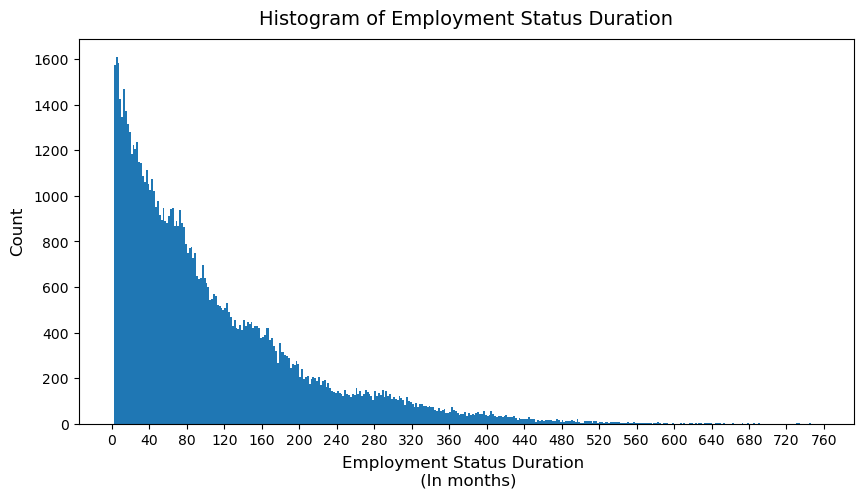

<Figure size 1000x500 with 0 Axes>

In [33]:
# Using matplotlib to plot a histogram of the "EmploymentStatusDuration" column
plt.figure(figsize=[10, 5]);
bins = np.arange(2, df.EmploymentStatusDuration.max()+1, 2)
ticks = np.arange(0,800,40)
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_df, x ='EmploymentStatusDuration', bins =bins, color = base_color);
plt.xticks(ticks, labels)
plt.title('Histogram of Employment Status Duration', fontsize=14, y=1.015)
plt.xlabel('Employment Status Duration \n (In months)', labelpad=6, fontsize=12)
plt.ylabel('Count', labelpad=6, fontsize=12)
plt.show();

> It is clear from the visualization that most employed borrowers are between 1 to 10 years of employment.

### Do borrowers have Home?

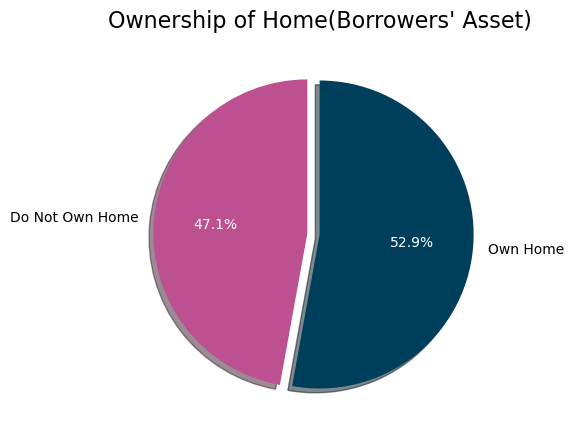

<Figure size 1000x500 with 0 Axes>

In [34]:
# Let's plot a pie chart of "IsBorrowerHomeowner"
_, _, autotexts = plt.pie(loan_df['IsBorrowerHomeowner'].value_counts(), labels = ['Own Home', 'Do Not Own Home'], 
        colors=['#003f5c', '#bc5090'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title(("Ownership of Home(Borrowers' Asset)"), fontsize=16, y=1.015)
plt.rcParams['font.size'] = 16
plt.show();

> About **53%** of the borrowers own a home.

> Let us examine the purpose for which borrowers need the loan.

### What are loan purpose listed by the borrowers? 

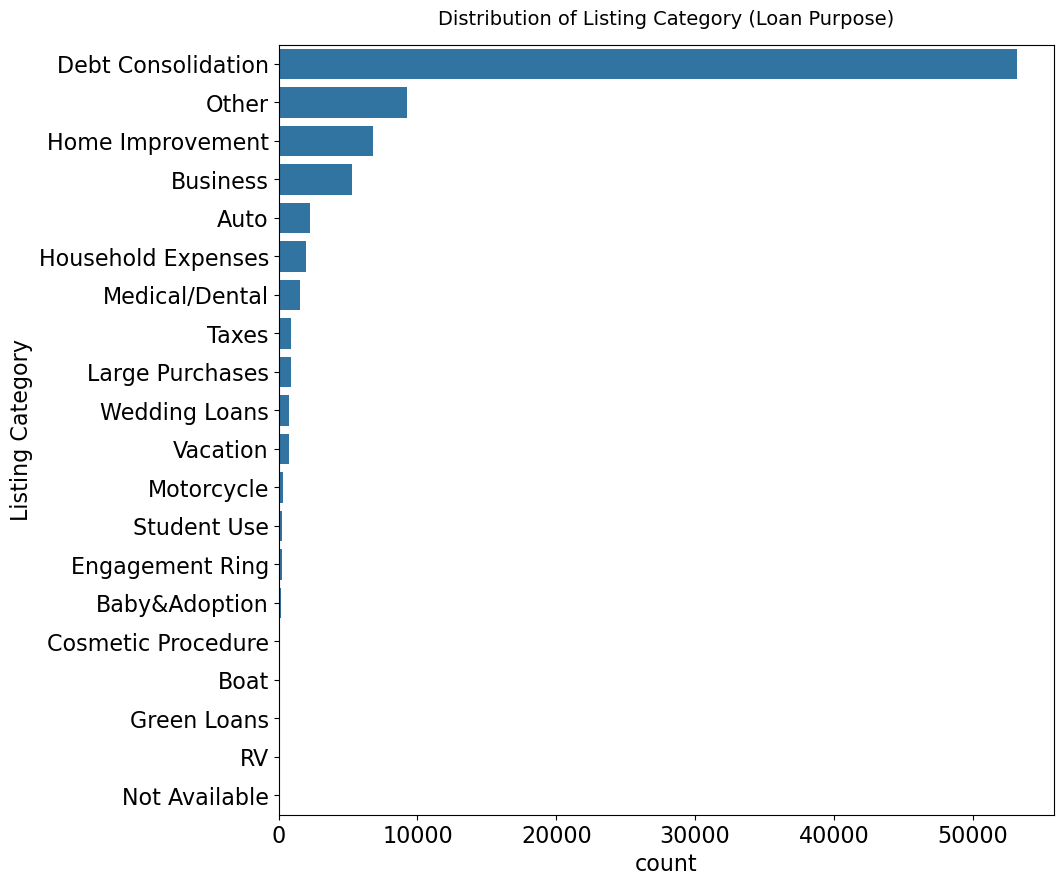

In [36]:
# Distribution of ListingCategory (Loan Purpose)
purpose_order = loan_df['ListingCategory'].value_counts().index
plt.figure(figsize=[10, 10]);
sns.countplot(data = loan_df, y = 'ListingCategory', color = base_color, order=purpose_order)
plt.ylabel('Listing Category');
plt.title('Distribution of Listing Category (Loan Purpose)', fontsize=14, y=1.015);

> More than **60%** of the borrowers need the loan for debt consolidation. 

### Is income of borrowers verifiable?

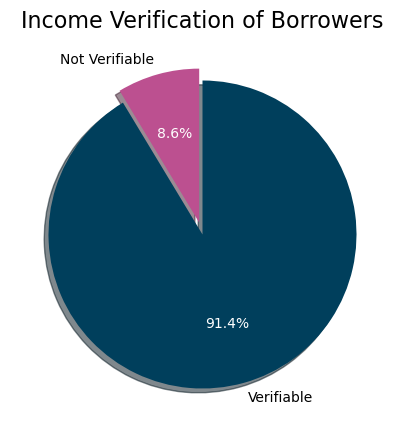

<Figure size 1500x2000 with 0 Axes>

In [45]:
### Income Verification of Borrowers
plt.figure(figsize =(10, 5));
_, _, autotexts = plt.pie(loan_df['IncomeVerifiable'].value_counts(), labels = ['Verifiable', 'Not Verifiable'], 
        colors=['#003f5c', '#bc5090'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title(("Income Verification of Borrowers"), fontsize=16, y=1.015);
plt.rcParams['font.size'] = 10
# showing the plot
plt.show();

> More than **90%** of borrowers' income is verifiable.

### Income Range of Borrowers

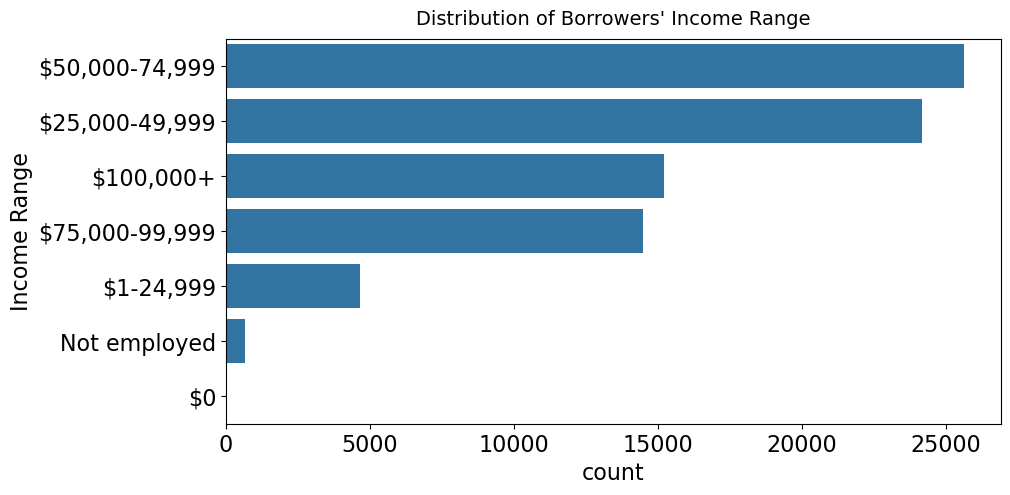

In [37]:
# Distribution of Borrowers' Income
income_order = loan_df.IncomeRange.value_counts().index
plt.figure(figsize=[10, 5]);
sns.countplot(data = loan_df, y = 'IncomeRange', color = base_color, order=income_order)
plt.ylabel('Income Range');
plt.title("Distribution of Borrowers' Income Range", fontsize=14, y=1.015);

> Most of the borrowers' income is between **\\$50,000 to $75,000 per annum.** 

# Insights about loan

### Loan Status

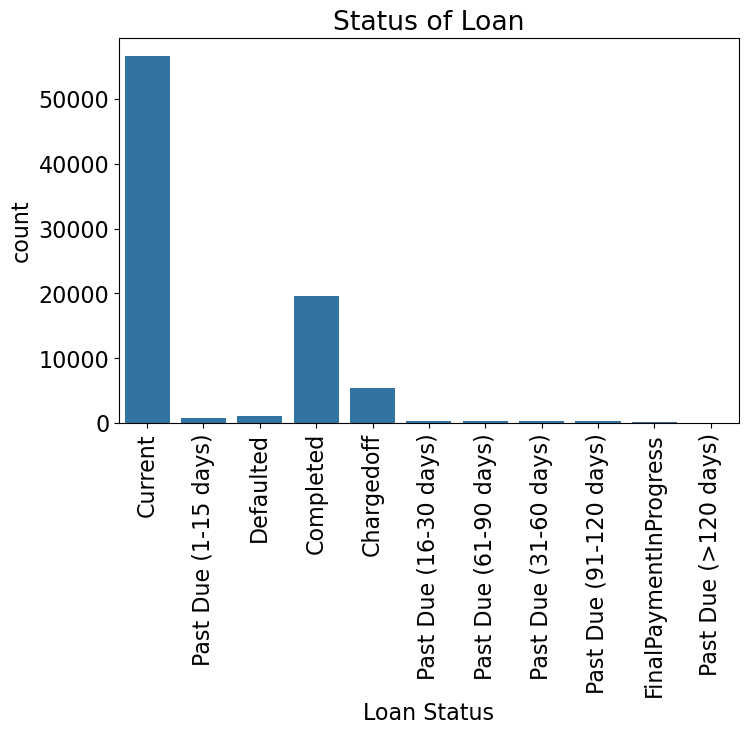

In [38]:
plt.figure(figsize=[8, 5])
sns.countplot(data=loan_df, x='LoanStatus', color=base_color)
plt.title('Status of Loan');
plt.xlabel('Loan Status');
plt.xticks(rotation=90);

> Most of the loan are current (under processing). Few of the loans have past due date and **less than 1% defaulted**. 

### DebtToIncomeRatio Distribution

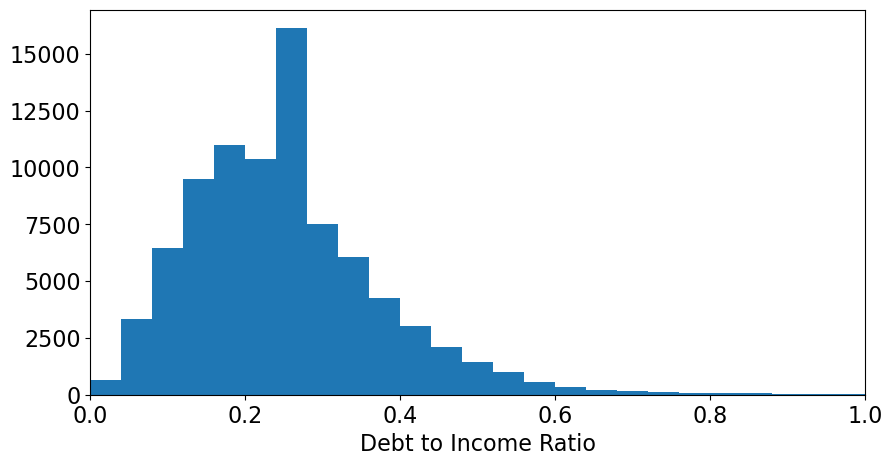

In [39]:
binsize = 0.04
bins = np.arange(0, loan_df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

> The distribution of Debt to Income Ratio is right-skewed. 

### Actual Amount of Loan

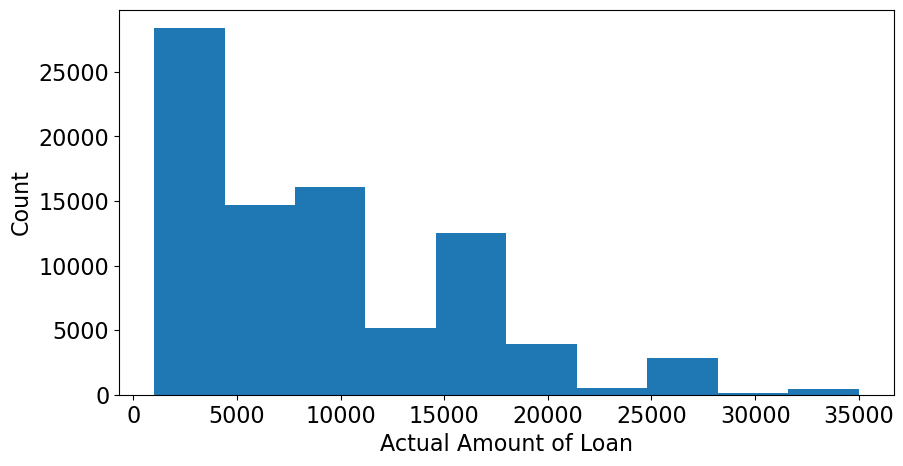

In [40]:
plt.hist(data = loan_df, x = 'LoanOriginalAmount')
plt.xlabel('Actual Amount of Loan');
plt.ylabel('Count');

> The loan amount distribution is also right-skewed. 

### Prosper Rating

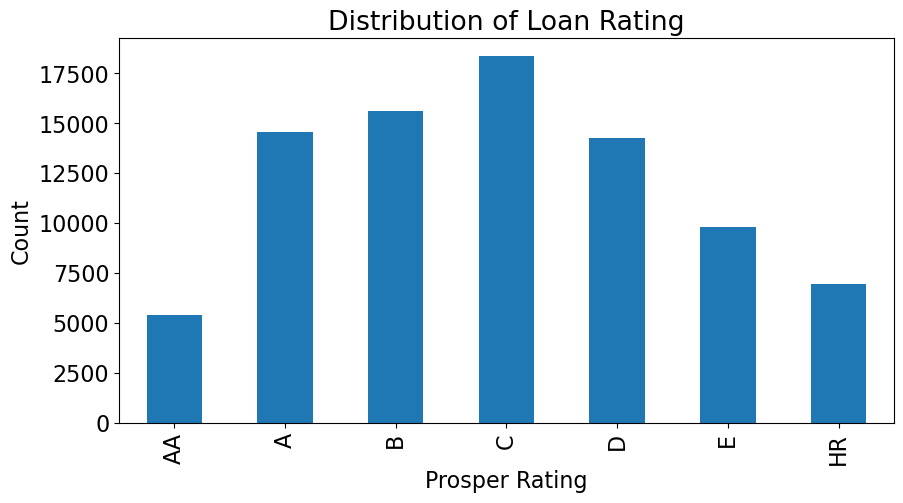

In [41]:
ax = loan_df.ProsperRating.value_counts().sort_index().plot(kind ='bar', title = 'Distribution of Loan Rating')
ax.set_xlabel('Prosper Rating')
ax.set_ylabel('Count');

> The rating of loans distibution is almost normal. 

### Prosper Score

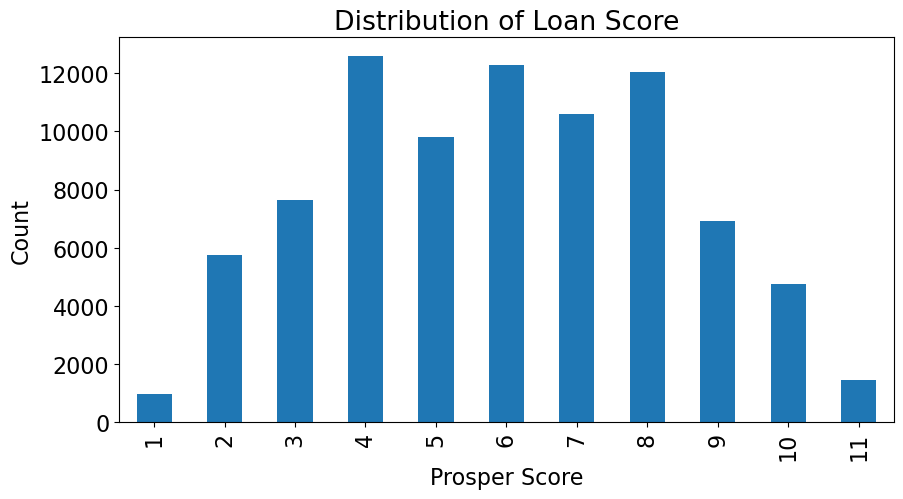

In [42]:
ax = loan_df.ProsperScore.value_counts().sort_index().plot(kind ='bar', title = 'Distribution of Loan Score')
ax.set_xlabel('Prosper Score')
ax.set_ylabel('Count');

> The distribution of Prosper score of borrowers is almost normal.

### Average Credit Score

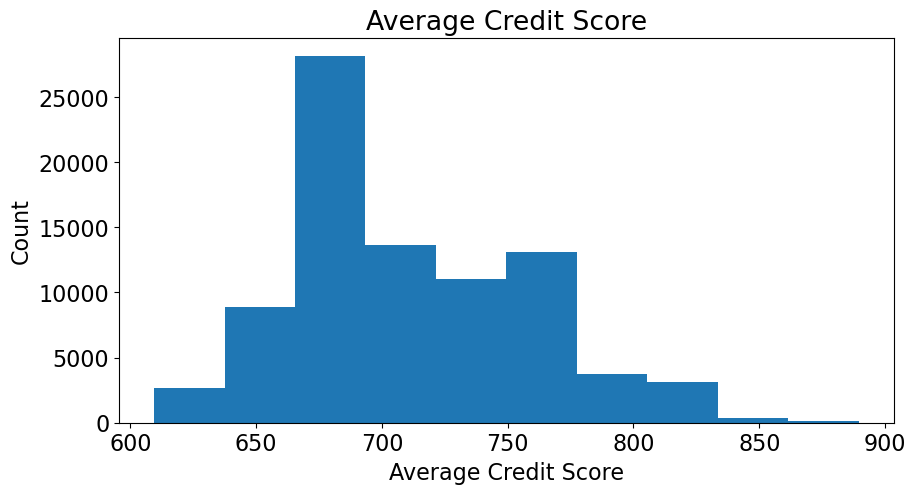

In [43]:
plt.hist(data = loan_df, x = 'Average_CreditScore')
plt.xlabel('Average Credit Score')
plt.ylabel('Count')
plt.title('Average Credit Score');

> The Average Credit Score of borrowers are all above minimum Score of 600 that lenders consider.

### Borrowers' Annual Percentage Rate

In [30]:
# We'll divide the data into two categories according to 'APR' value. Under and above 14%
rate_strength = loan_df.BorrowerAPR >= 0.14
rate_strength.value_counts()

True     71715
False    13138
Name: BorrowerAPR, dtype: int64

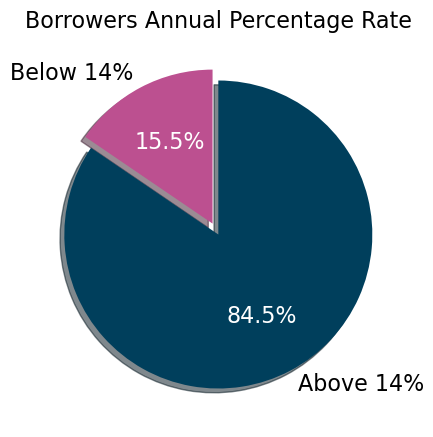

<Figure size 1000x500 with 0 Axes>

In [45]:
# plot of pie chart
_, _, autotexts = plt.pie(rate_strength.value_counts(), labels = ['Above 14%', 'Below 14%'], 
        colors=['#003f5c', '#bc5090'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title('Borrowers Annual Percentage Rate', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 16
# showing the plot
plt.show();

> More than **80% of borrowers APR is above 14%**.

### Terms of Repayment

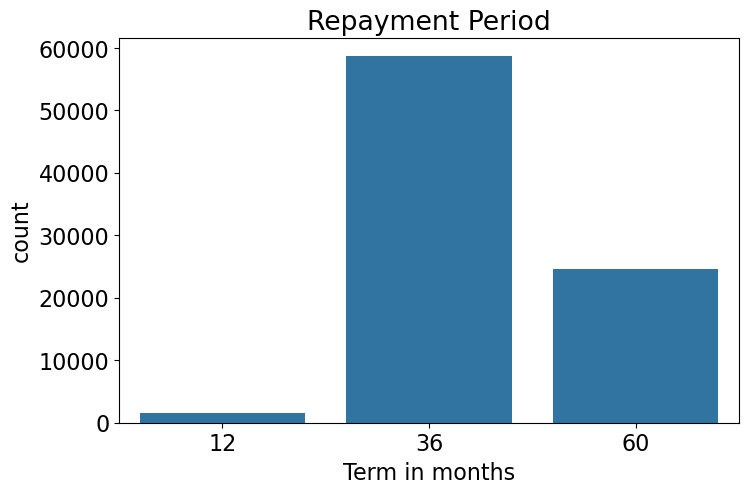

In [46]:
plt.figure(figsize=[8, 5])
sns.countplot(data=loan_df, x='Term', color=base_color)
plt.title('Repayment Period');
plt.xlabel('Term in months');

> Over **60% of borrowers** stated to repay their loan in 36 months (3 years) whereas very few stated 12 months (1 year).

# Insights on Time of loan/Location of Borrower

### Borrowers' State

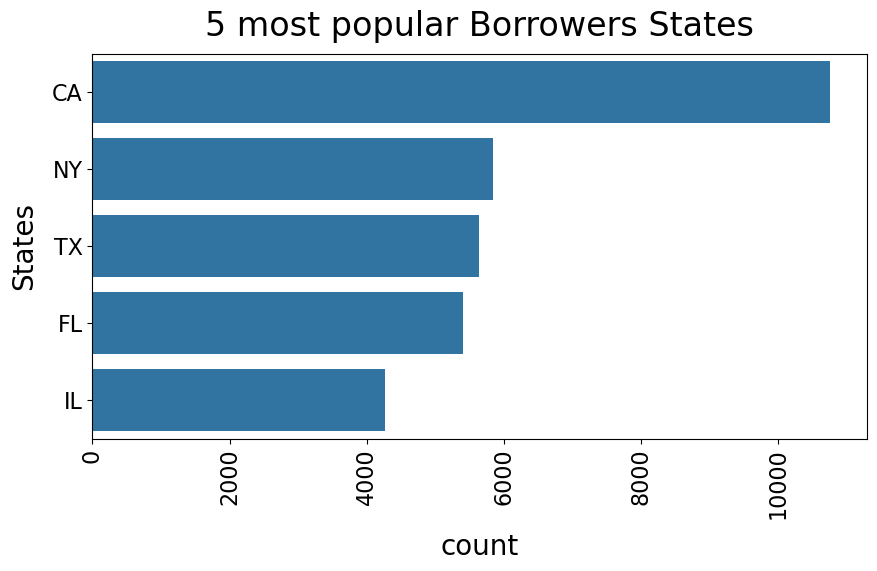

In [50]:
# 5 most popular Borrowers' States
sns.barplot(x=popular_state, y=popular_state.index, color=base_color)
plt.title('5 most popular Borrowers States', fontsize=24, y=1.025)
plt.xlabel('count', labelpad=10, fontsize=20)
plt.ylabel('States', labelpad=10, fontsize=20)
plt.xticks(rotation=90);

> Most of the borrowers are from **California (CA)** being the most populated state in USA.

### Month of Loan Application

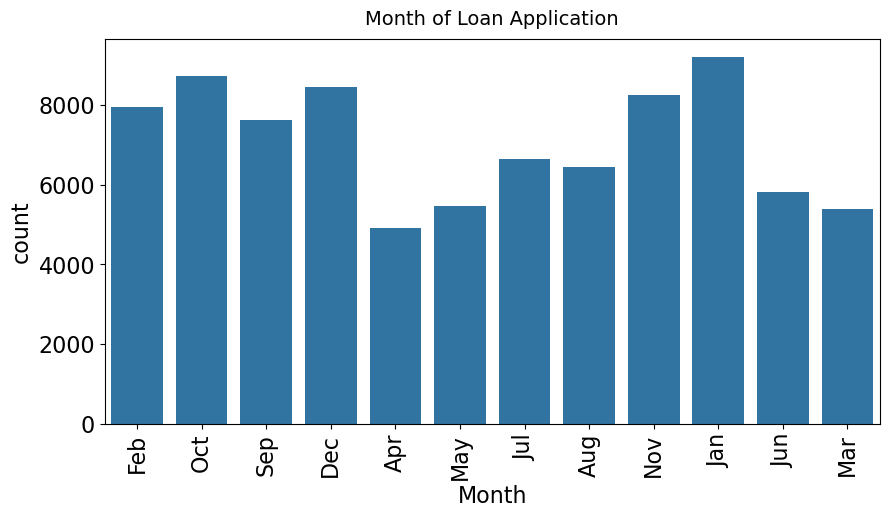

In [51]:
plt.xticks(rotation=90);
rcParams['figure.figsize'] = 10,5 
sns.countplot(data =loan_df, x='month', color=base_color);
plt.title("Month of Loan Application", fontsize=14, y=1.015);
plt.xlabel('Month');

> There are more loan applications during **fall (September, October, November and December)** than any other seasons.

### Year of Loan Application

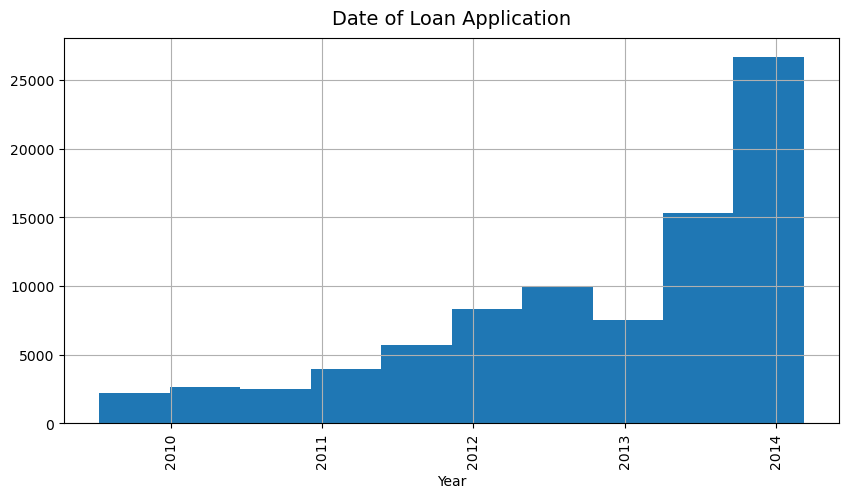

In [35]:
# Plot histogram for Date of loan Application
plt.xticks(rotation=90);
loan_df.date.hist(figsize=(10,5))
plt.title("Date of Loan Application", fontsize=14, y=1.015);
plt.xlabel('Year');

> It is seen from the chart that there was low application in **2010;** as this is the year US begins to recover from the Great Recession (2007 -2009).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of variables of interest are discussed as follows:

**About borrowers**

1.Most borrowers are Professionals. Although, some did not specify their occupation and many are grouped under "others". None of the students' categories falls within the top 25 occupation. This is due to the fact that many of the students do not have a source of earning.

2.More than 70% of borrowers are employed and few are doing a part-time job. This could be the contributory factor to low number of students among borrowers.

3.Most employed borrowers are between 1 to 10 years of employment and few of those that have spent more than 30 years do apply for the loan.

4.About 53% of the borrowers own a home. This indicates that most borrowers do not need the loan to get a home.

5.More than 90% of borrowers' income is verifiable. This is a contributory factor why more than 95% of the loans are funded.

6.The Average Credit Score of borrowers are all above minimum Score of 600. This is also a contributory factor why more than 95% of the loans are funded.

7.Most of the borrowers' income is between \\$50,000 and $75,000 per annum.

8.Most of the borrowers are from California (CA) being the most populated state in USA. Others in the list of top 5 states are: New York (NY), Texas (TX), Florida (FL) and Illinois (IL).

**About loan**

1.Most of the loan are current (under processing). Few of the loans have past due date and less than 1% defaulted. This indicates that there are strict measures for monitoring loan repayment.

2.The distribution of Debt-to-Income Ratio is right-skewed. This shows that most borrowers debt to income ratio is low. This is why most of the loans are funded, as lenders consider those with low debt to income ratio.

3.More than 60% of the borrowers need the loan for debt consolidation. However, few of them need the loan for wedding, vacation, study, among others.

4.There are more loan applications during fall (September, October, November and December) than any other seasons. However, loan application is at peak at the beginning of the year (January).

5.There was low application in 2010; as this is the year US begins to recover from the Great Recession (2007 -2009) and most household are trying to payoff accumulated debts. However, there is appreciable increase in loan application from 2010 to 2013. There was a rapid increase in the number in 2014. This is due to the fact that the total number of jobs in this year returns to its level before recession in 2007.

6.The loan amount distribution is also right-skewed. This shows that most of amount requested by borrowers is less than $10,000.00

7.The rating of loans distribution is almost normal. Few are rated high (AA = 7), many are averagely rated (C = 4) and few are rated low (HR = 1).

8.The distribution of Prosper score of borrowers is almost normal. There are few at low and high score but more at the medium score.

9.More than 80% of borrowers APR is above 14%. This also affects loan funding as APR of 14% and above is good for lenders.

**About Repayment**

1.Over 60% of borrowers stated to repay their loan in 36 months (3 years) whereas very few stated 12 months (1 year). This is related to the actual amount requested and loan repayment. Large number of borrowers requested for \\$10,000 and stated to repay less than \\$500 monthly. This is about 10% of monthly income of those earning an average of \\$5,000 monthly (average monthly income of those earning between \\$50,000 and \\$75,000 USD annually).


> Yes, there is a need to transform some of the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are some unusual distributions in the dataset.

> Yes, some operations were performed to transform the given data.

1.Loan Origination Date and Listing Creation Date were converted to datetime in order to make it easy to analyse.

2.Listing Creation Date was splitted into month, date and year.

3.Numbers in Listing Category were changed to name for easy analysis.

4.Number of months were changed to month names for easy visualization.

5.Lower and Upper Credit Score was transformed to Average Score for proper representation of Credit Score.

6.Borrowers APR was grouped into two; those below 14% and those with 14% and above. This is done for analysis purpose.

7.Prosper Rating was converted to ordinal type.

## Bivariate Exploration

> I will check the correlation between the variables in our dataset

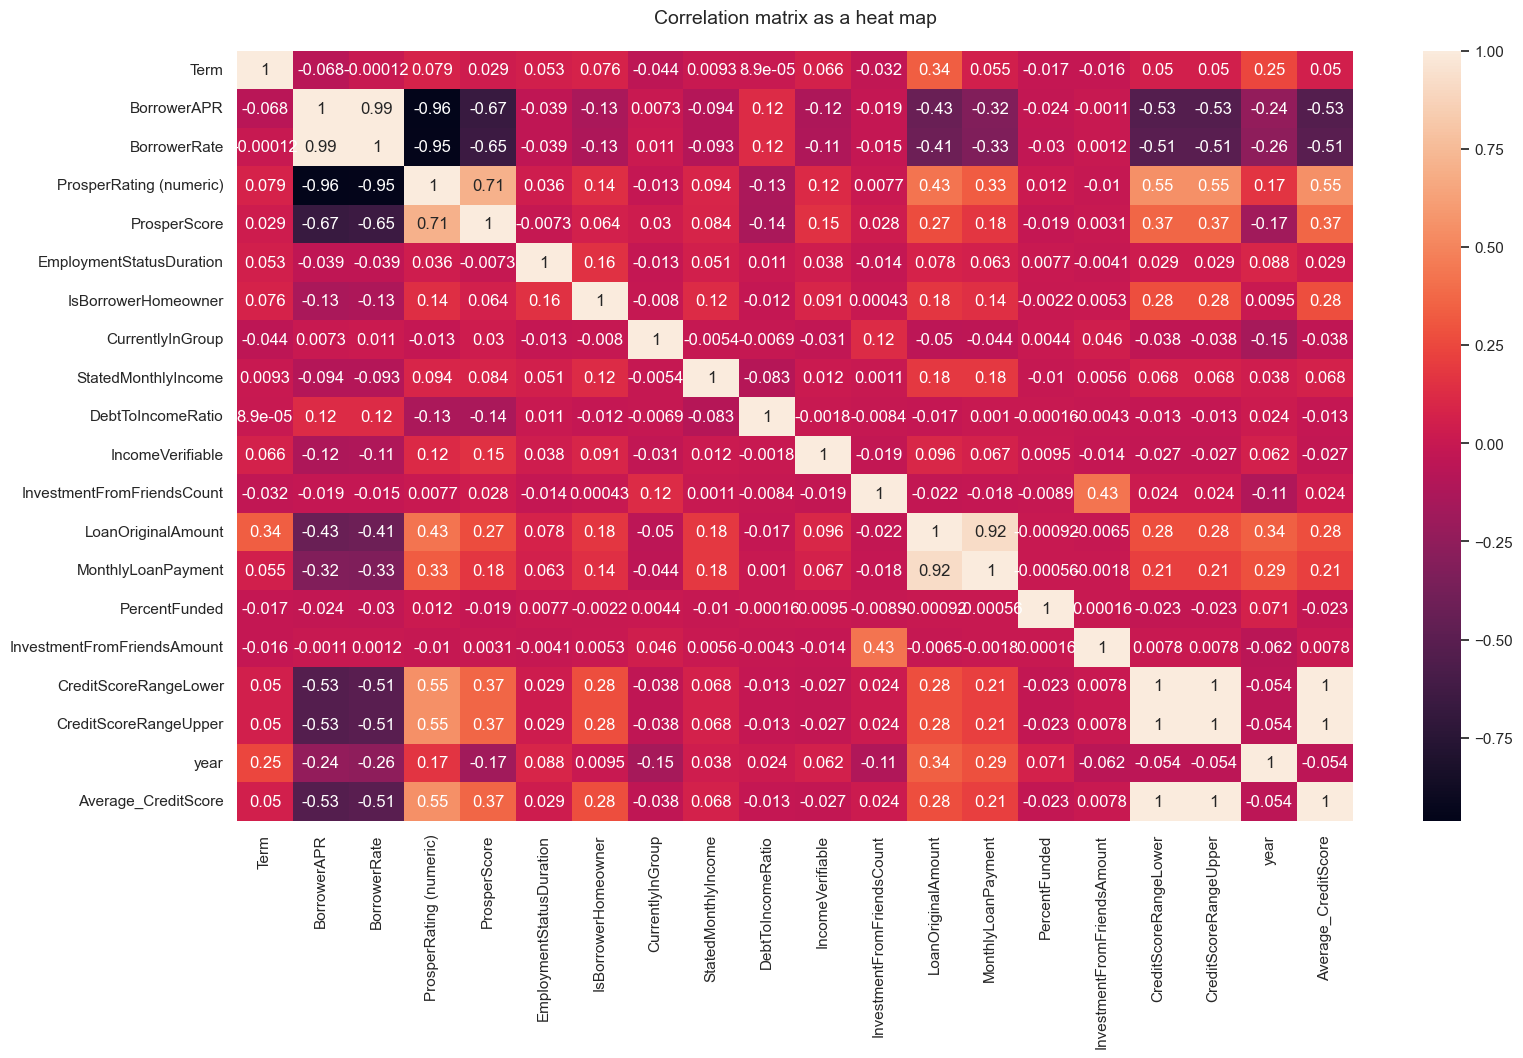

In [53]:
corr_df = loan_df.corr()
sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(corr_df, annot=True)
plt.title('Correlation matrix as a heat map', fontsize=14, y=1.025)
plt.show()

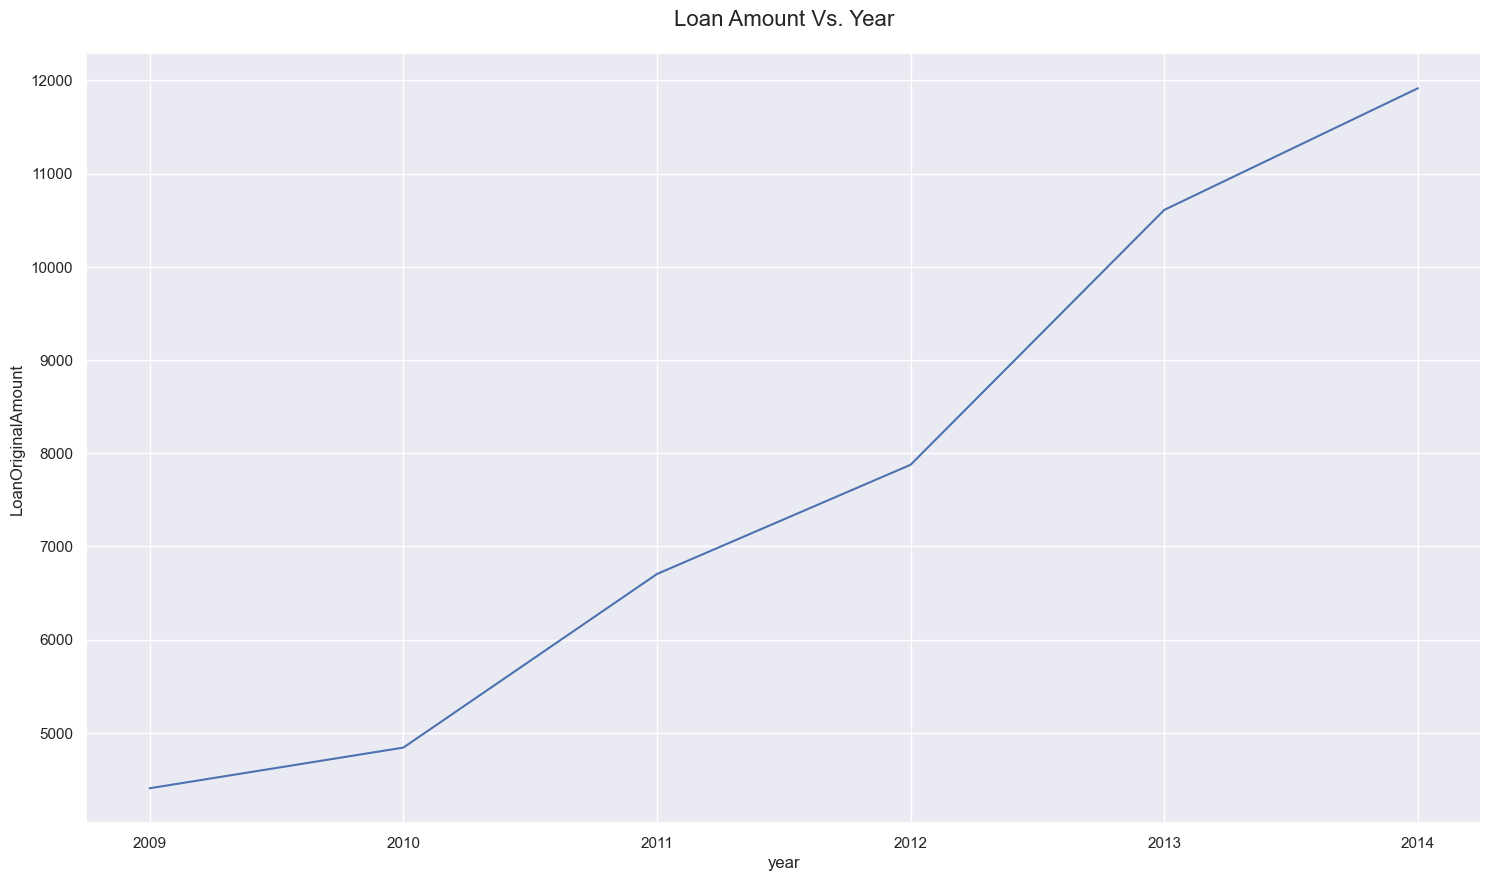

In [55]:
# plots the pointplot for loanOriginalAmount vs year
sns.lineplot(data=loan_df, x='year', y='LoanOriginalAmount', ci=None);
plt.title('Loan Amount Vs. Year', fontsize=16, y=1.025)

> There is a positive correlation between loan amount and year. 

### Borrowers with/without verifiable income over the year

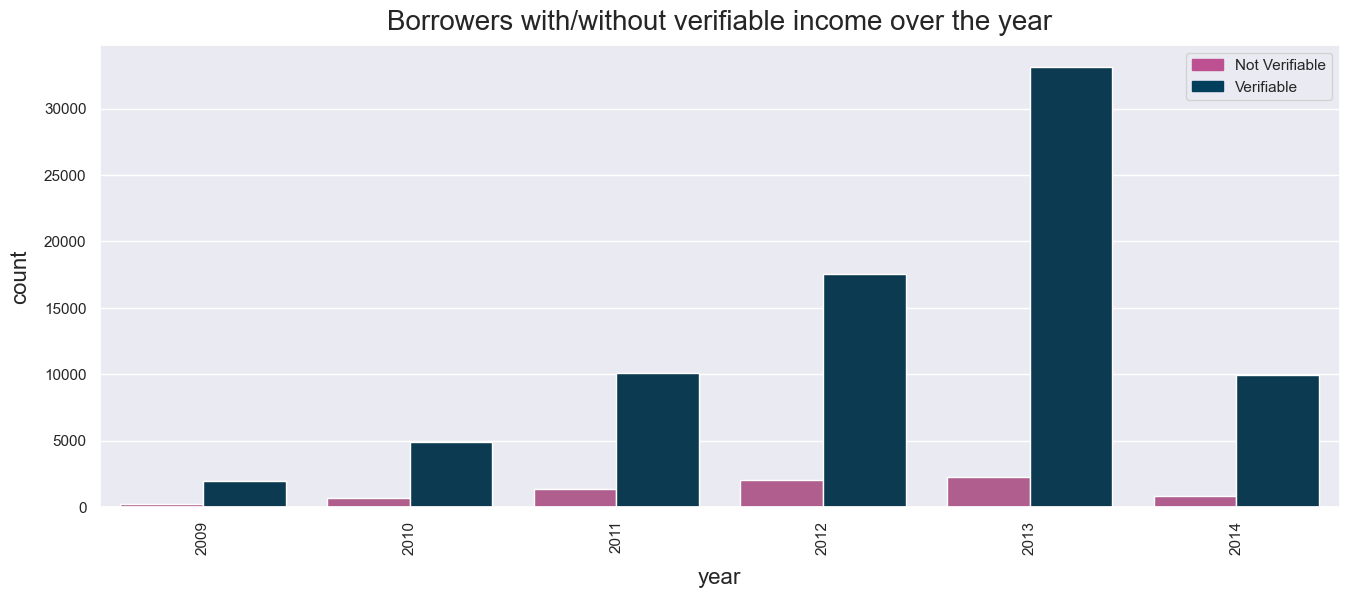

<Figure size 1600x600 with 0 Axes>

In [58]:
# Plot of borrowers with/without verifiable income over the years
rcParams['figure.figsize'] = 16,6
sns.countplot(data=loan_df, x= 'year', hue='IncomeVerifiable', palette=['#bc5090', '#003f5c'])
plt.title('Borrowers with/without verifiable income over the year', fontsize=20, y=1.015);
plt.xlabel('year', labelpad=10, fontsize=16);
plt.ylabel('count', labelpad=10, fontsize=16);
plt.xticks(rotation=90); # Use xticks to rotate the labels counter-clockwise
# Creation of legends for the plot
verifiable_legend = mpatches.Patch(color='#003f5c', label='Verifiable')
notverifiable_legend = mpatches.Patch(color='#bc5090', label='Not Verifiable')
plt.legend(handles=[notverifiable_legend, verifiable_legend])
plt.show();

> Borrowers with verifiable income increase over the years rapidly than those without verifiable income.

### Prosper Score of Borrowers with/without verifiable income

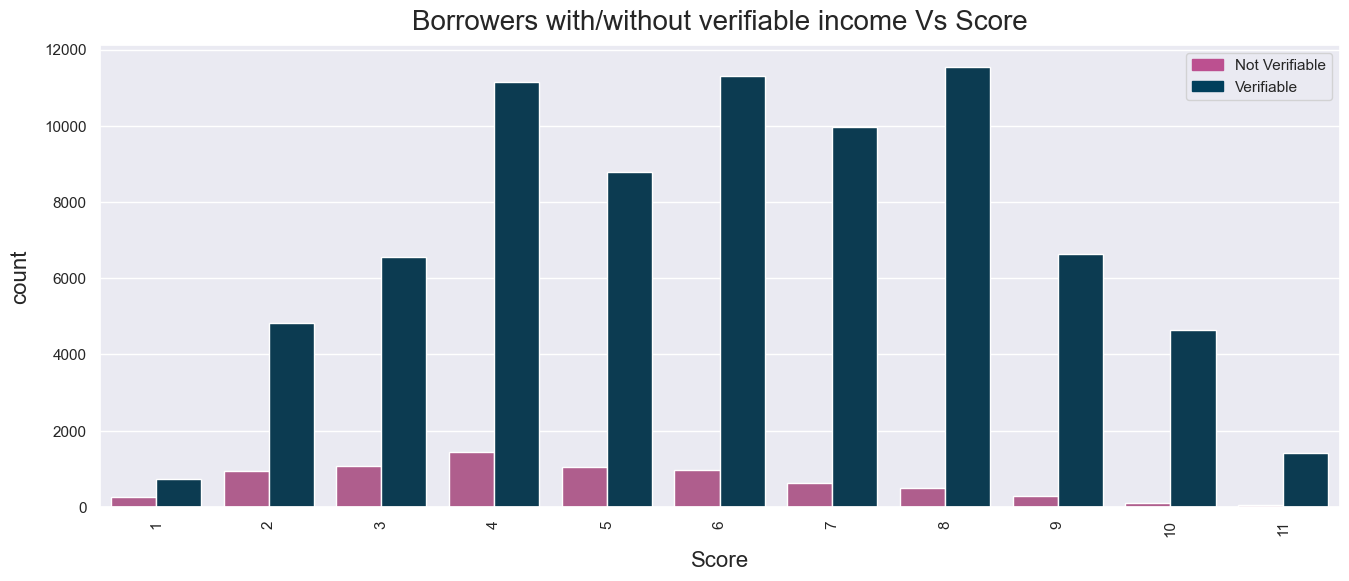

<Figure size 1600x600 with 0 Axes>

In [59]:
# Plot of Prosper Score of Borrowers with/without verifiable income
rcParams['figure.figsize'] = 16,6
sns.countplot(data=loan_df, x= 'ProsperScore', hue='IncomeVerifiable', palette=['#bc5090', '#003f5c'])
plt.title('Borrowers with/without verifiable income Vs Score', fontsize=20, y=1.015);
plt.xlabel('Score', labelpad=10, fontsize=16);
plt.ylabel('count', labelpad=10, fontsize=16);
plt.xticks(rotation=90); # Use xticks to rotate the labels counter-clockwise
# Create legends for the plot
verifiable_legend = mpatches.Patch(color='#003f5c', label='Verifiable')
notverifiable_legend = mpatches.Patch(color='#bc5090', label='Not Verifiable')
plt.legend(handles=[notverifiable_legend, verifiable_legend])
plt.show();

> Borrowers with verifiable income get higher scores as compared to those without verifiable income.

### Average Credit Score vs BorrowerRate

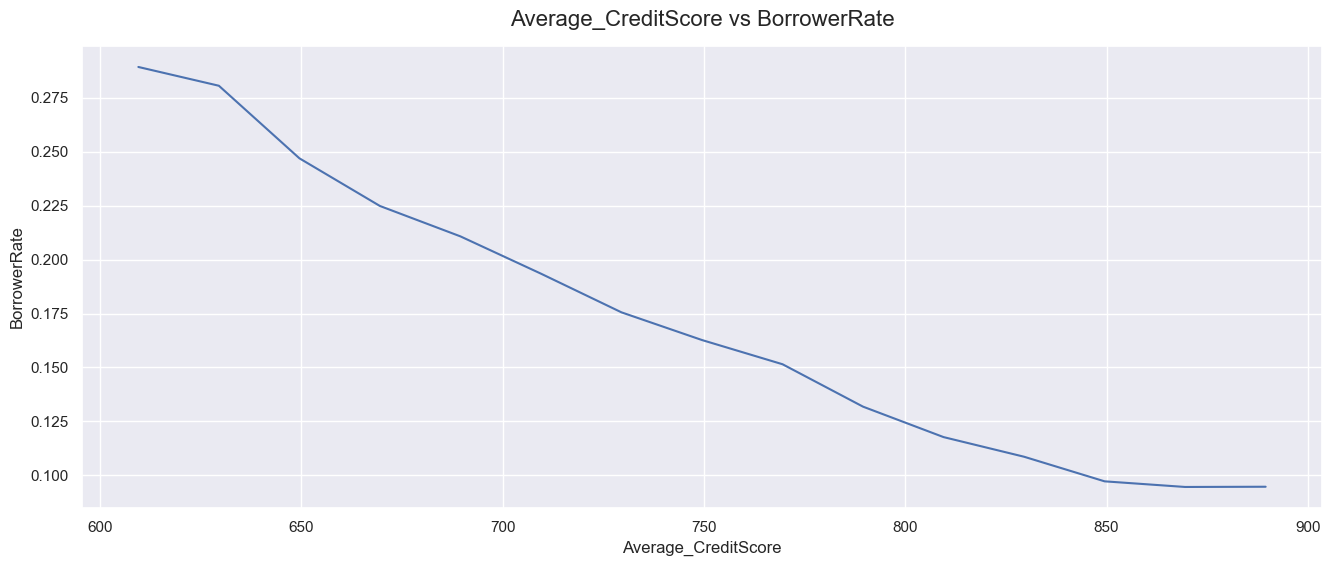

In [60]:
# plots the pointplot for Average_CreditScore vs BorrowerRate
sns.lineplot(data=loan_df, x='Average_CreditScore', y='BorrowerRate', ci=None);
plt.title('Average_CreditScore vs BorrowerRate', fontsize=16, y=1.025);

> There is a negative correlation between Borrower Rate and Average Credit Score.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The following are relationships observed in the Bivariate Exploration

1.There is a positive correlation between loan amount and year. It is seen from the chart that there was low amount in **2009; as this is the year US begins to recover from the Great Recession (2007 -2009) and most household are trying to payoff accumulated debts. However, there is appreciable increase in loan application from 2010 to 2013.** There was a rapid increase in the number in **2014**.This is due to the fact that the total number of jobs in this year returns to its level before recession in 2007.

2.Borrowers with verifiable income increase over the years rapidly than those without verifiable income.

3.There is a relationship between borrowers with verifiable income as they get higher scores as compared to those without verifiable income.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. There is a negative correlation between Borrower Rate and Average Credit Score. The lower the Rate, the higher the Average Credit Score. This is because lenders give preference to those with lower Borrower Rate and hence are rated higher score.

## Multivariate Exploration

### Relationship between Monthly Income and Loan Amount for Each APR Strength

In [31]:
# We will create income category based on minimum modal monthly wage in US;$1160 ($7.25/hour)
income_category = loan_df.StatedMonthlyIncome >= 1160
income_category.value_counts()

True     83182
False     1671
Name: StatedMonthlyIncome, dtype: int64

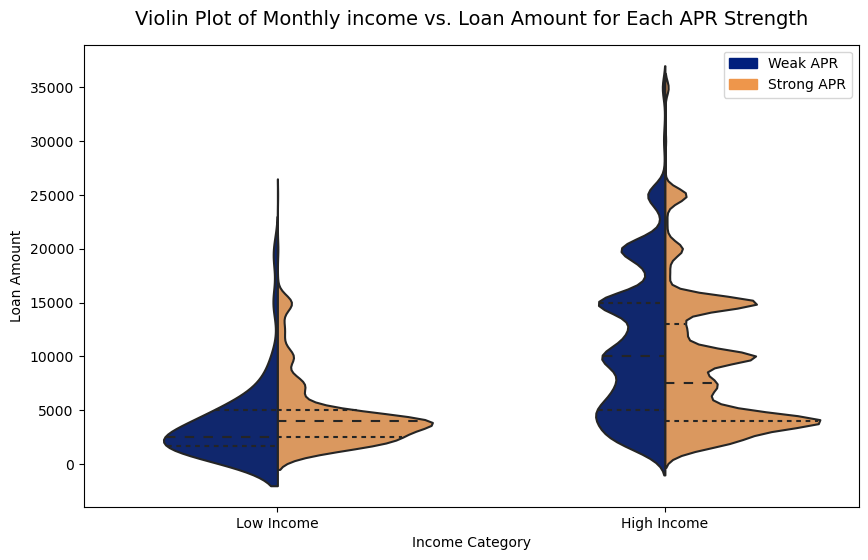

<Figure size 1000x600 with 0 Axes>

In [32]:
# Violin plot of `income category` vs `Loan Amount` for each APR strength
rcParams['figure.figsize'] = 10,6
sns.violinplot(x=income_category, y=loan_df.LoanOriginalAmount, hue=rate_strength, inner='quartile', palette=['#001f7d', '#ee964b'], split=True)
ticks = income_category.value_counts().index
labels = ['High Income', 'Low Income']
plt.xticks(ticks, labels)
plt.title('Violin Plot of Monthly income vs. Loan Amount for Each APR Strength', fontsize=14, y=1.025)
plt.xlabel('Income Category')
plt.ylabel('Loan Amount');
# Create legends for the plot
weak_legend = mpatches.Patch(color='#001f7d', label='Weak APR')
strong_legend = mpatches.Patch(color='#ee964b', label='Strong APR')
plt.legend(handles=[weak_legend, strong_legend])
plt.show();

> Borrowers with high income (minimum wage and above) request for higher loan compared to those with low income (below minimum wage) for both categories of APR and are more distributed.

### Relationship between Borrower Rate, year and Ownership of House

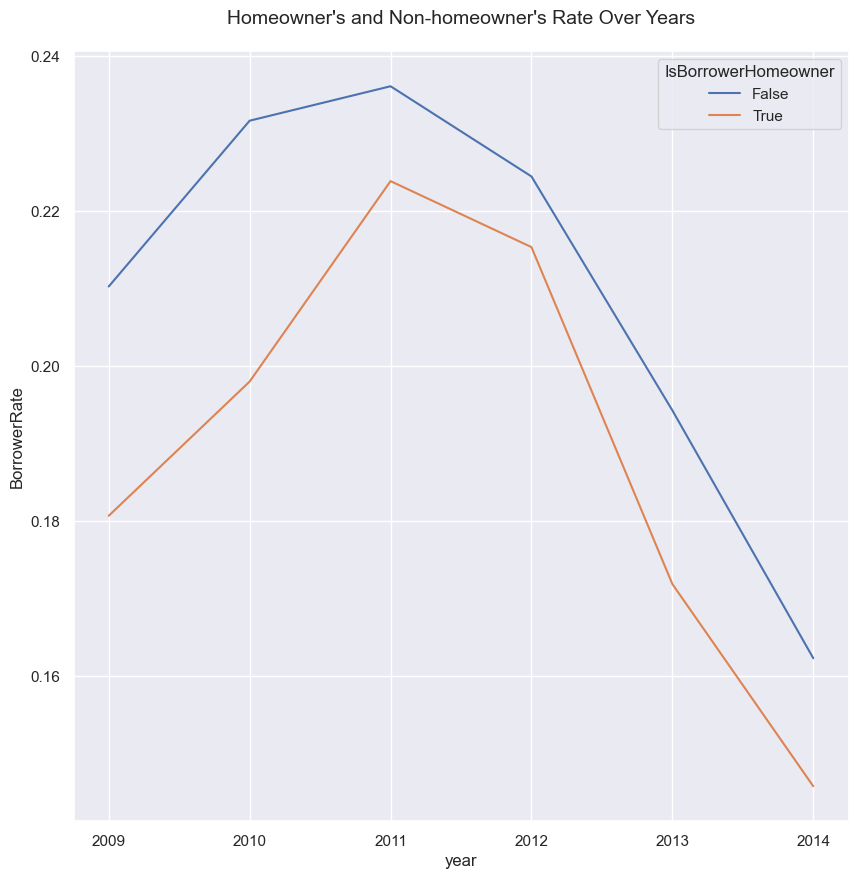

In [71]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
sns.lineplot(data =loan_df, x= 'year', y= 'BorrowerRate', hue='IsBorrowerHomeowner', ci=None);
plt.title("Homeowner's and Non-homeowner's Rate Over Years", fontsize=14, y=1.025);

> There is an increase and a fall in Borrower Rate for both home and non-home owners over the year with lowest being in 2014.

### Relationship between Prosper Rating and PercentFunded for Borrowers with/without Group

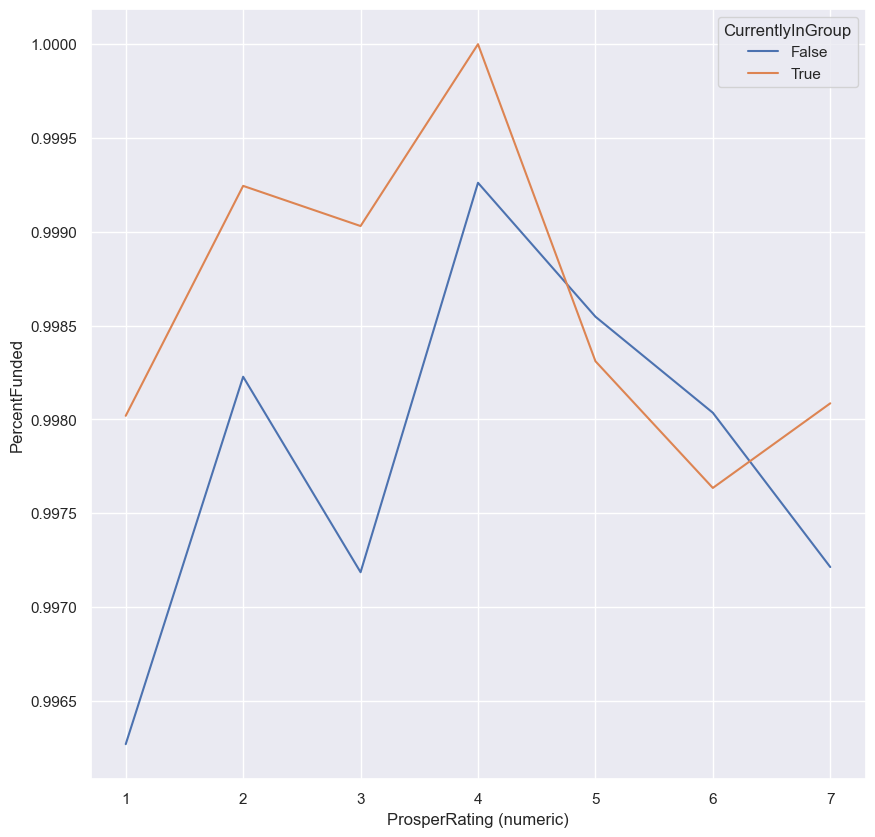

In [72]:
# plots the lineplot to analyze Prosper Rating and PercentFunded for Borrowers with/without Group
plt.figure(figsize=(10,10))
sns.lineplot(data=loan_df, x='ProsperRating (numeric)', y='PercentFunded', hue='CurrentlyInGroup',ci=None);

> At low prosper rating, borrowers that belong to groups are more funded than those without group.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The following are relationships observed in this part:

1.Borrowers with high income (minimum wage and above) request for higher loan compared to those with low income (below minimum wage) for both categories of APR and are more distributed.

2.There is an increase and a fall in Borrower Rate for both home and non-home owners over the year with lowest being in 2014.
Borrower rate for both home owners and non-home owners increased between 2009 to 2011, although higher for home owners. This rapidly decreased from 2011 to 2014, where it is lowest. It is therefore established that borrowers without home have higher interest rate and the rapid fall in the rate in 2014 is attributed to increment in number of jobs in US after the economic recession of 2007 -2009.

3.At low prosper rating, borrowers that belong to groups are more funded than those without group. However, at higher ratings, no preference for those that belong to group. Borrowers that belong to groups with low prosper ratings get funded than those without group. This indicates that those that belong to groups with low prosper rating get preference over those without group.

### Were there any interesting or surprising interactions between features?

> Yes, there are interesting interaction between Borrowers rate, income, ownership of home and belonging to a group. There tends to be a consideration for borrowers with low prosper rating that belong to group. Some factors such as interest rate and loan amount and number of loan application change over the year. Also borrowers with home tend to have lower interst rate.

## Conclusions
> In conclusion, 84853 prosper loan data were analyzed. In the exploration, I found that most borrowers are home owners, Professinals, employed; with verifiable income and low debt-income-ratio and majorly from California. Most borrowers income is between  \\$50,000 to $75,000 per annum and more than 60% of the borrowers need the loan for debt consolidation. There are few students among borrowers and loan request increased over the years with peak in 2014.

> Finally, Borrowers Rate, Prosper Rating, Credit Score, Borrower APR are some of the factors that affect prosper loan.
